In [1]:
import pandas as pd
import os
import school_analysis as sa

path=os.path.join(sa.PROJECT_PATH, "data", "genesis","students_with_sepecial_educational_support.csv")
df = pd.read_csv(os.path.join(sa.PROJECT_PATH ,path), sep=";", skiprows=5, skipfooter=4, engine="python")
df.replace("b'", "", inplace=True, regex=True)


df

,b'Pupils with special educational support (number),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,'
0,,NaN,School year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'
1,,NaN,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,...,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,2022/23'
2,Primary schools,Learning,19471,19864,20359,18562,20129,21062,22141,23967,...,31139,31050,31817,31515,32162,39039,41124,40959,39925,38564'
3,,Seeing,814,843,881,683,745,724,832,787,...,1079,1146,1204,1232,1256,1530,1530,1521,1457,1422'
4,,Hearing,1510,1488,1653,1372,1315,1426,1551,1553,...,2543,2689,2851,2777,2843,3474,3396,3381,3364,3250'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,,Not assigned to a main area of support,13182,12927,13777,12792,11917,11626,11413,11777,...,10311,10839,10765,11717,12624,13380,13431,3087,3062,3265'
121,,Total,466921,474998,483105,478409,476958,474820,470886,471188,...,475345,477715,482994,486680,495680,541548,557076,568701,576942,582714'
122,__________',None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
123,"""Grammar schools (9 years of schooling):'",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [2]:
years = [item for item in df.iloc[1].dropna().tolist() if item!='' and item!='\'']

school_types = [item for item in df.iloc[:,0] if item!=""][:-4]

data = []

for idx, type in enumerate(school_types):
    total = df.iloc[1+(len(school_types)-1)*(idx+1)].to_list()[2:]
    for value, year in zip(total, years):         
         try:
              if value is None:
                   continue
              value = float(value)
              data.append({'school type': type, 'students needed support': value, 'year': year})
         except:
              pass         

df_melted = pd.DataFrame(data)


df_melted

,school type,students needed support,year
0,Primary schools,38533.0,2000/01
1,Primary schools,39375.0,2001/02
2,Primary schools,41117.0,2002/03
3,Primary schools,37997.0,2003/04
4,Primary schools,40470.0,2004/05
...,...,...,...
207,Special schools,306431.0,2017/18
208,Special schools,309780.0,2018/19
209,Special schools,313857.0,2019/20
210,Special schools,317118.0,2020/21


findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

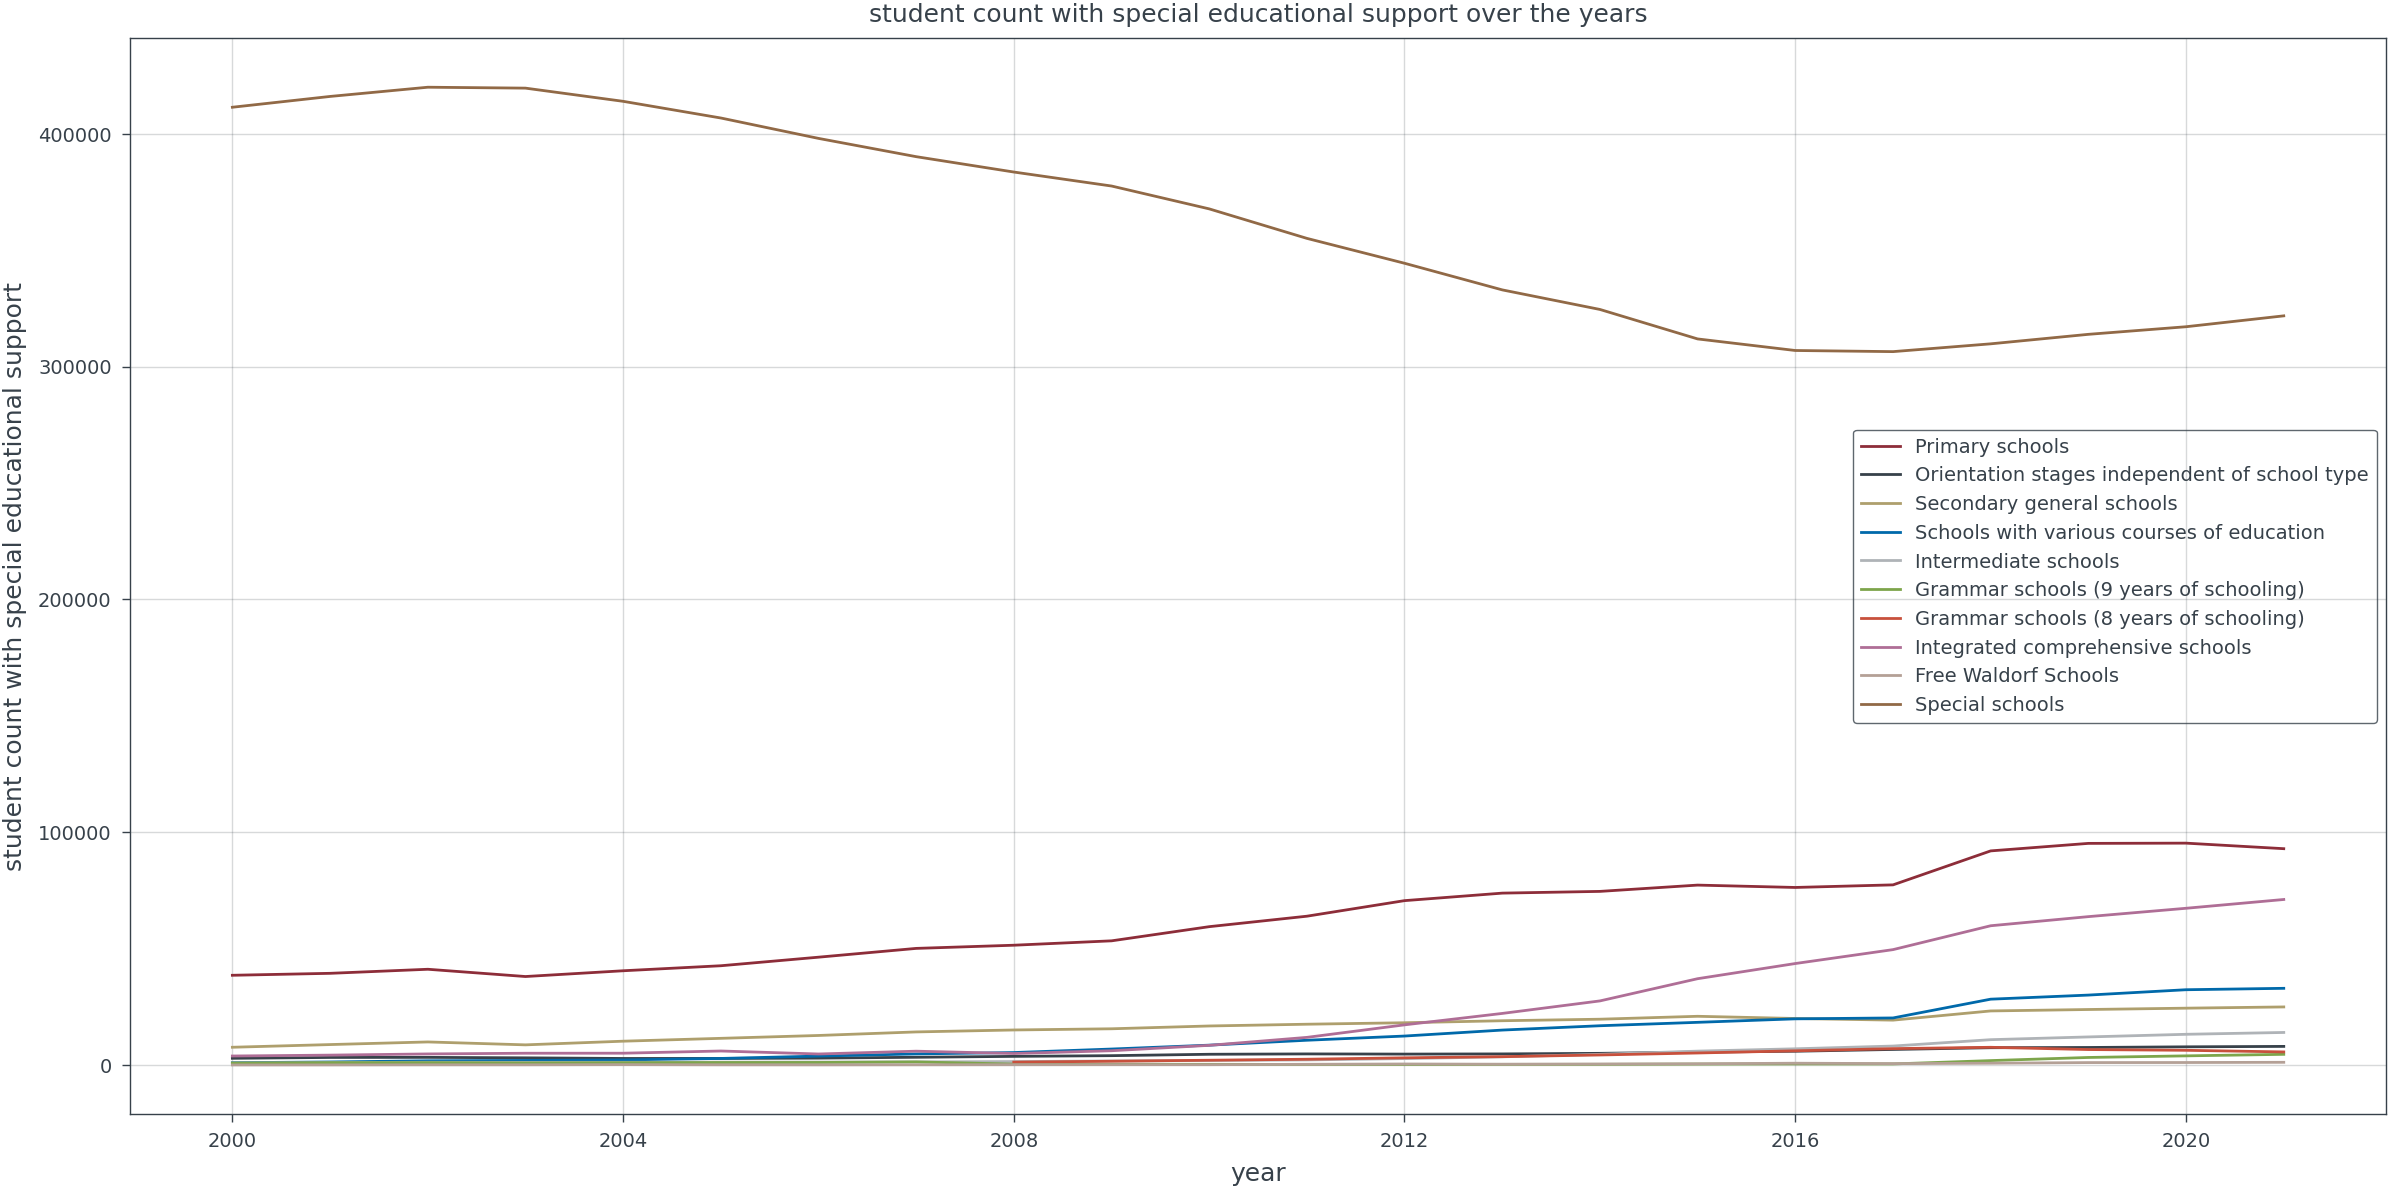

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df_melted["students needed support"] = df_melted["students needed support"].replace('-', None)

# Convert year to a consistent datetime format (taking the first year in the range)
df_melted["year"] = pd.to_datetime(df_melted["year"].str.split('/').str[0], format='%Y')

# Plotting the data
plt.figure(figsize=(12, 6))
for school_type in df_melted["school type"].unique():
    subset = df_melted[df_melted["school type"] == school_type]
    plt.plot(subset["year"], subset["students needed support"], label=school_type)

plt.xlabel("year")
plt.ylabel("student count with special educational support")
plt.title("student count with special educational support over the years")
plt.legend()
plt.grid(True)
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

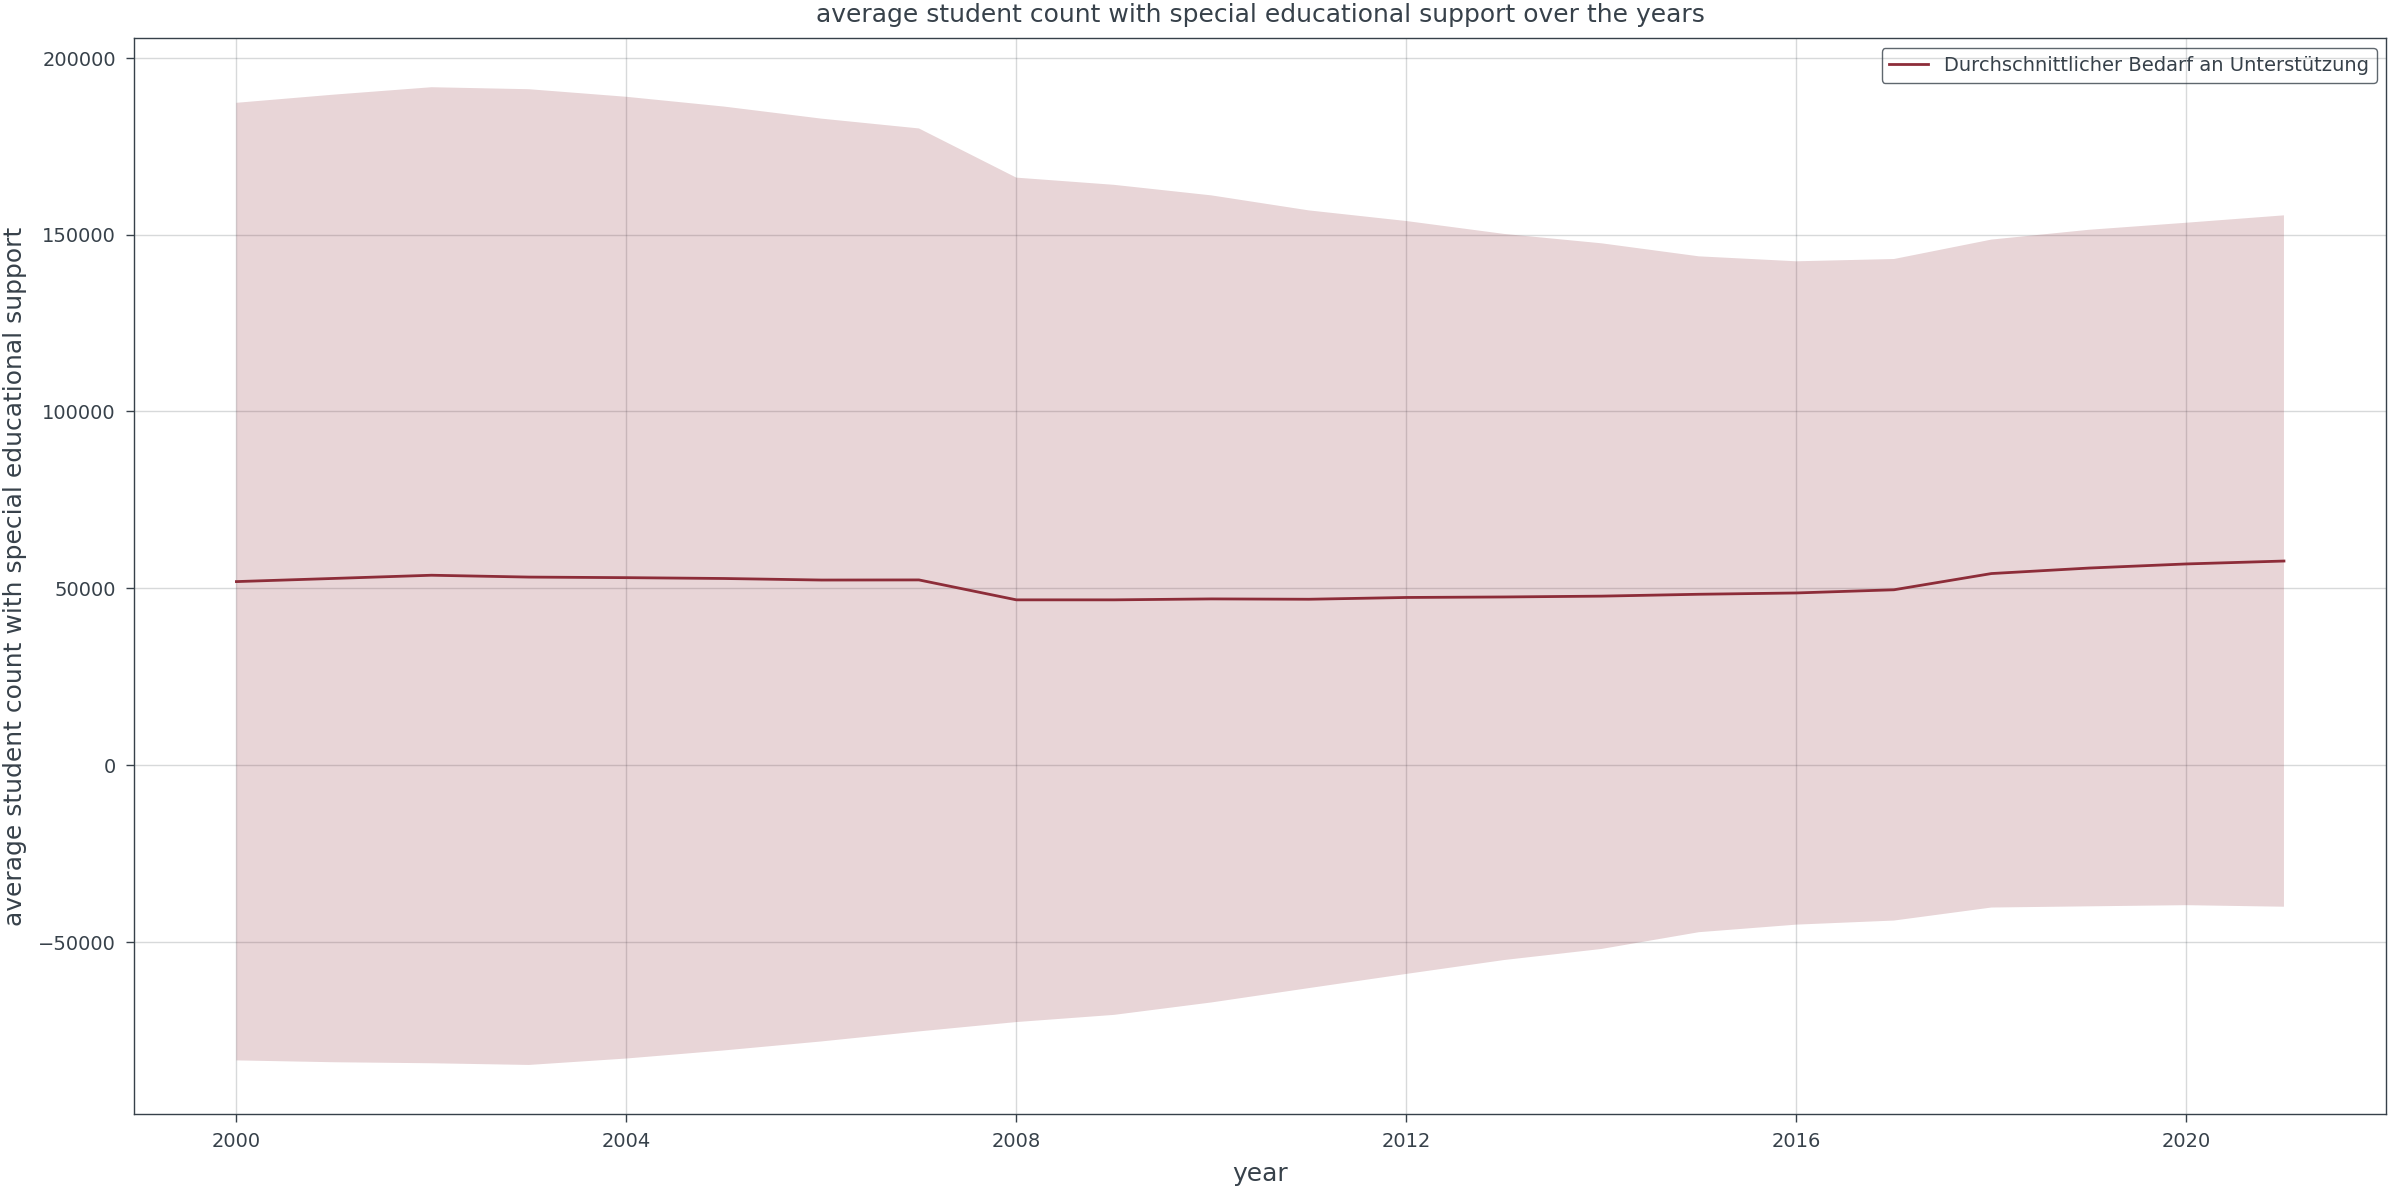

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

grouped = df_melted.groupby('year')['students needed support']
average_support = grouped.mean()
std_deviation = grouped.std()

plt.figure(figsize=(12, 6))
plt.plot(average_support.index, average_support, label='Durchschnittlicher Bedarf an Unterstützung')
plt.fill_between(average_support.index, average_support-std_deviation, average_support+std_deviation, alpha=0.2)


plt.xlabel("year")
plt.ylabel("average student count with special educational support")
plt.title("average student count with special educational support over the years")
plt.legend()
plt.grid(True)
plt.show()
